In [1]:
%pip install --upgrade chromadb
%pip install pillow
%pip install open-clip-torch
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
from matplotlib import pyplot as plt

In [3]:
# Create database file at folder "my_vectordb" or load into client if exists.
chroma_client = chromadb.PersistentClient(path="my_vectordb")

# Instantiate image loader helper.
image_loader = ImageLoader()

# Instantiate multimodal embedding function.
multimodal_ef = OpenCLIPEmbeddingFunction()

# Create the collection, aka vector database. Or, if database already exist, then use it. Specify the model that we want to use to do the embedding.
multimodal_db = chroma_client.get_or_create_collection(name="multimodal_db", embedding_function=multimodal_ef, data_loader=image_loader)

/Users/dhawansolanki/anaconda3/envs/chromadb_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Use .add() to add a new record or .update() to update existing record
multimodal_db.add(
    ids=['0', '1'], 
    uris=['images/dhawansolanki.png', 'images/ajaydevgan.png'],
    metadatas=[{'img_category':'person'}, {'img_category':'person'}]
)

In [7]:
# Check record count
multimodal_db.count()


2

In [8]:
# Simple function to print the results of a query.
# The 'results' is a dict {ids, distances, data, ...}
# Each item in the dict is a 2d list.
def print_query_results(query_list: list, query_results: dict)->None:
    result_count = len(query_results['ids'][0])

    for i in range(len(query_list)):
        print(f'Results for query: {query_list[i]}')

        for j in range(result_count):
            id       = query_results["ids"][i][j]
            distance = query_results['distances'][i][j]
            data     = query_results['data'][i][j]
            document = query_results['documents'][i][j]
            metadata = query_results['metadatas'][i][j]
            uri      = query_results['uris'][i][j]

            print(f'id: {id}, distance: {distance}, metadata: {metadata}, document: {document}') 

            # Display image, the physical file must exist at URI.
            # (ImageLoader loads the image from file)
            print(f'data: {uri}')
            plt.imshow(data)
            plt.axis("off")
            plt.show()

In [25]:
# Use .add() to add a new record or .update() to update existing record
multimodal_db.update(
    ids=[
        '0',
        '1', 
    ],
    uris=[
        'images/dhawansolanki.png',
        'images/ajaydevgan.png',
    ],
    metadatas=[
        {"item_id":'0', 'img_category':'person', 'item_name':'Dhawan Solanki, Software Developer at Magicroll.ai'},
        {"item_id":'1', 'img_category':'person', 'item_name':'Ajay Devgan is a Bollywood Actor'},
    ]
)

Results for query: Dhawan Solanki
id: 0, distance: 1.4693636395699035, metadata: {'img_category': 'person', 'item_id': '0', 'item_name': 'Dhawan Solanki, Software Developer at Magicroll.ai'}, document: None
data: images/dhawansolanki.png


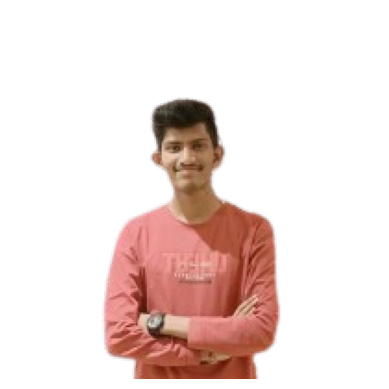

id: 1, distance: 1.736190960434034, metadata: {'img_category': 'person', 'item_id': '1', 'item_name': 'Ajay Devgan is a Bollywood Actor'}, document: None
data: images/ajaydevgan.png


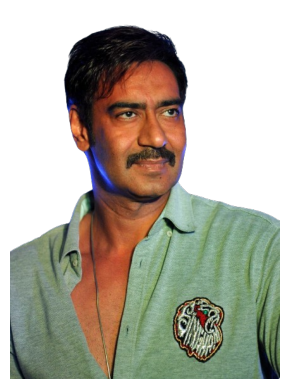

In [27]:
# It is possible to submit multiple queries at the same time, just add to the list.  
query_texts = ['Dhawan Solanki']

# Query vector db
query_results = multimodal_db.query(
    query_texts = query_texts,
    n_results=5,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'img_category':'person'}
)

print_query_results(query_texts, query_results)